# EDA for loan (Bank) data

In [4]:
import pandas as pd
import seaborn as snn
import missingno as msno
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('./data/application_data.csv')

### 1. Dataset overview

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
print("=" * 70)
print(" " * 20 + "HOME CREDIT - BANK LOAN DATA OVERVIEW")
print("=" * 70)

print(f"Total number of loan applications       : {len(df):,}")
print(f"Total number of columns                  : {df.shape[1]}")
print(f"Dataframe memory usage                   : {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

print(f"Unique SK_ID_CURR                        : {df['SK_ID_CURR'].nunique():,} ", end="")
if df['SK_ID_CURR'].nunique() == len(df):
    print("→ No duplicates")
else:
    print(f"→ {len(df) - df['SK_ID_CURR'].nunique():,} duplicates!")

print("-" * 70)

print("TARGET DISTRIBUTION (1 = client with payment difficulties)")
print("-" * 70)
target_counts = df['TARGET'].value_counts().sort_index()
default_rate = target_counts[1] / len(df) * 100
print(f"0  → Repaid on time   : {target_counts[0]:,} ({100-default_rate:5.2f}%)")
print(f"1  → Defaulted        : {target_counts[1]:,} ({default_rate:5.2f}%)")
print()

print("TOP 15 COLUMNS BY NUMBER OF UNIQUE VALUES")
print("-" * 70)
for col, count in df.nunique().sort_values(ascending=False).head(15).items():
    print(f"{col:<40} → {count:>8,} unique values")
print()

print("MISSING VALUES (only columns with NaN)")
print("-" * 70)
missing = df.isna().sum()
missing = missing[missing > 0].sort_values(ascending=False)

if missing.empty:
    print("No missing values – dataset is perfectly clean!")
else:
    for col, cnt in missing.head(15).items():
        perc = cnt / len(df) * 100
        print(f"{col:<40} → {cnt:>7,} ({perc:5.2f}%) missing")
    if len(missing) > 15:
        print(f"          ... and {len(missing)-15} more columns with missing data")

print()
total_cells = np.product(df.shape)
total_missing = missing.sum()
print(f"Overall data completeness                : {(1 - total_missing/total_cells)*100:5.2f}%")

print("\nKEY NUMERICAL COLUMNS - BASIC STATISTICS")
print("-" * 70)
key_nums = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED']
print(df[key_nums].describe().round(0).astype(int))

print("\nSAMPLE CATEGORICAL COLUMNS")
print("-" * 70)
for col in ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
    if col in df.columns:
        print(f"\n{col}")
        print(df[col].value_counts().to_string())

                    HOME CREDIT - BANK LOAN DATA OVERVIEW
Total number of loan applications       : 307,511
Total number of columns                  : 122
Dataframe memory usage                   : 505.0 MB
Unique SK_ID_CURR                        : 307,511 → No duplicates
----------------------------------------------------------------------
TARGET DISTRIBUTION (1 = client with payment difficulties)
----------------------------------------------------------------------
0  → Repaid on time   : 282,686 (91.93%)
1  → Defaulted        : 24,825 ( 8.07%)

TOP 15 COLUMNS BY NUMBER OF UNIQUE VALUES
----------------------------------------------------------------------
SK_ID_CURR                               →  307,511 unique values
EXT_SOURCE_2                             →  119,831 unique values
EXT_SOURCE_1                             →  114,584 unique values
DAYS_BIRTH                               →   17,460 unique values
DAYS_REGISTRATION                        →   15,688 unique values


### 1.1 Change DataFormat

In [9]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df['CODE_GENDER']     = df['CODE_GENDER'].map({'M': 1, 'F': 0})
df['FLAG_OWN_CAR']    = df['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0})
df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].map({'Y': 1, 'N': 0})

In [11]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,1.0,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,0.0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,1.0,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,0.0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,1.0,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df.sample(15)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
20584,124002,0,Cash loans,0.0,0,1,0,180000.0,545040.0,26640.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
45805,153070,0,Cash loans,1.0,0,1,1,202500.0,450000.0,21109.5,...,0,0,0,0,0.0,0.0,0.0,9.0,2.0,4.0
95538,210922,0,Revolving loans,0.0,0,1,0,337500.0,765000.0,38250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
228763,364973,0,Cash loans,0.0,0,1,2,112500.0,225000.0,23625.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
199570,331364,0,Cash loans,0.0,0,0,0,90000.0,225000.0,26703.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
213723,347652,0,Cash loans,0.0,0,1,0,135000.0,254700.0,24939.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
88972,203304,0,Cash loans,1.0,1,1,1,238500.0,1354500.0,39735.0,...,0,0,0,0,0.0,0.0,1.0,10.0,2.0,2.0
83529,196881,0,Cash loans,0.0,1,1,0,202500.0,1800000.0,54706.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
72149,183673,0,Cash loans,1.0,1,1,1,270000.0,497520.0,33376.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
245837,384487,0,Cash loans,1.0,1,1,0,180000.0,521280.0,35392.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [13]:
df = df.dropna()

In [14]:
df = df.drop_duplicates()

In [15]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,1.0,1,1,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,0.0,1,1,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,0.0,1,0,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,1.0,1,0,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,Cash loans,1.0,1,0,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0


In [21]:
def build_summary(df, target_col='TARGET'):
    summary_list = []

    for col in df.columns:
        if col == target_col:
            continue
        
        if df[col].dtype != 'object':
            good = df[df[target_col] == 0][col].mean()
            bad = df[df[target_col] == 1][col].mean()

            diff = ((bad - good) / good) * 100 if good != 0 else 0

            summary_list.append([col, good, bad, diff])

    summary = pd.DataFrame(summary_list, columns=['Feature', 'Good (0)', 'Bad (1)', 'Diff (%)'])
    summary = summary.sort_values('Diff (%)', ascending=False).set_index('Feature')

    return summary

summary = build_summary(df)

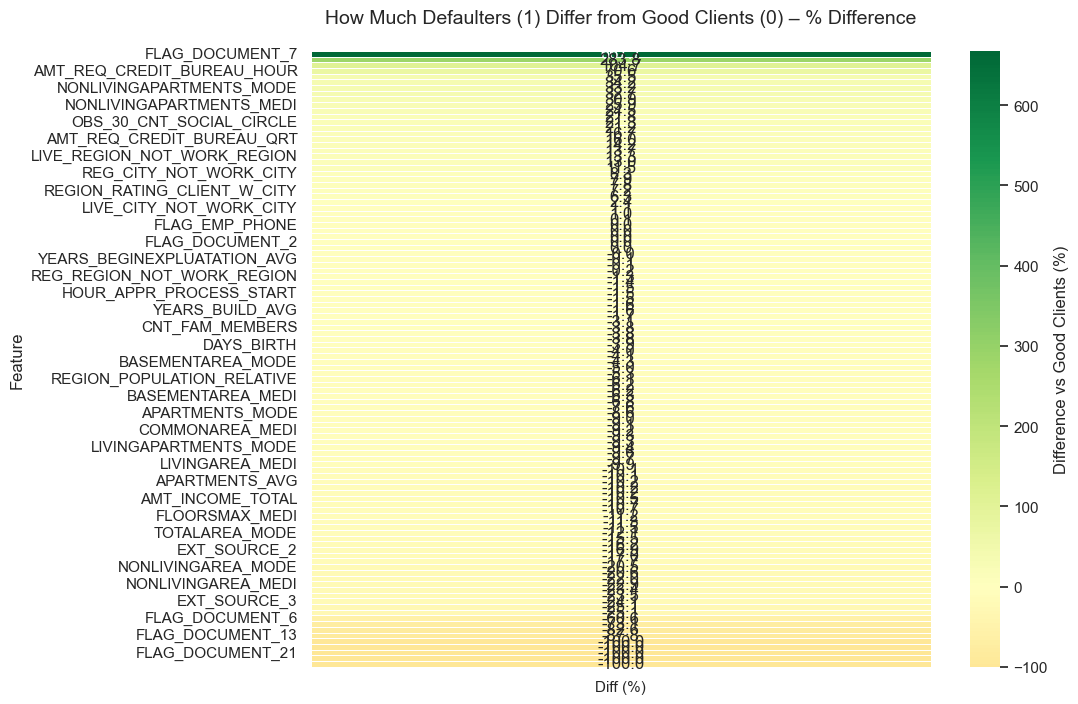

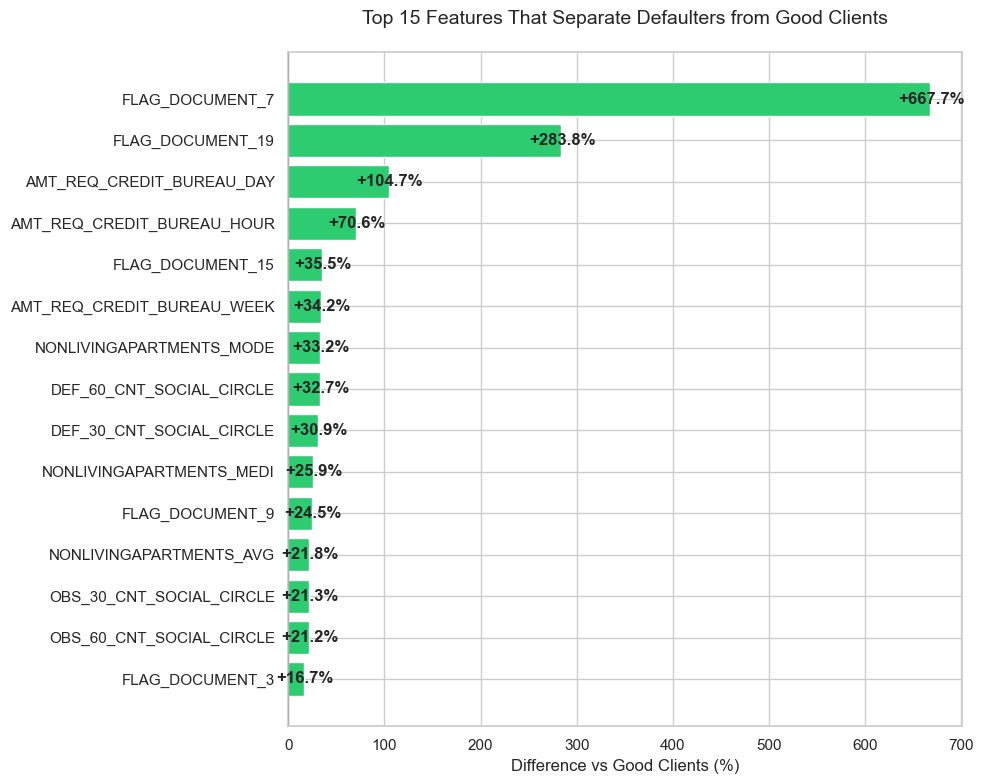

C:\Users\User\AppData\Local\Temp\ipykernel_8112\200375551.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['TARGET']==0]['EXT_SOURCE_3'], label='Repaid (0)', shade=True, color=colors[0])
C:\Users\User\AppData\Local\Temp\ipykernel_8112\200375551.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['TARGET']==1]['EXT_SOURCE_3'], label='Defaulted (1)', shade=True, color=colors[1])


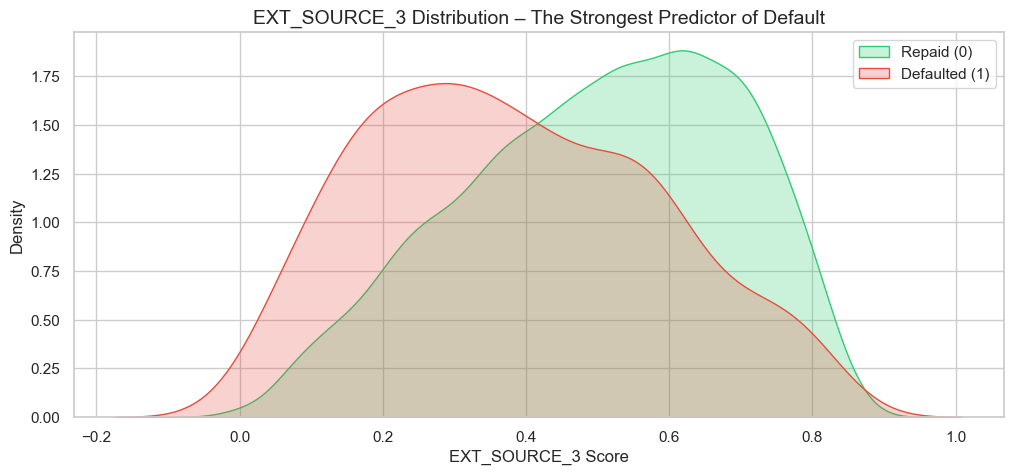

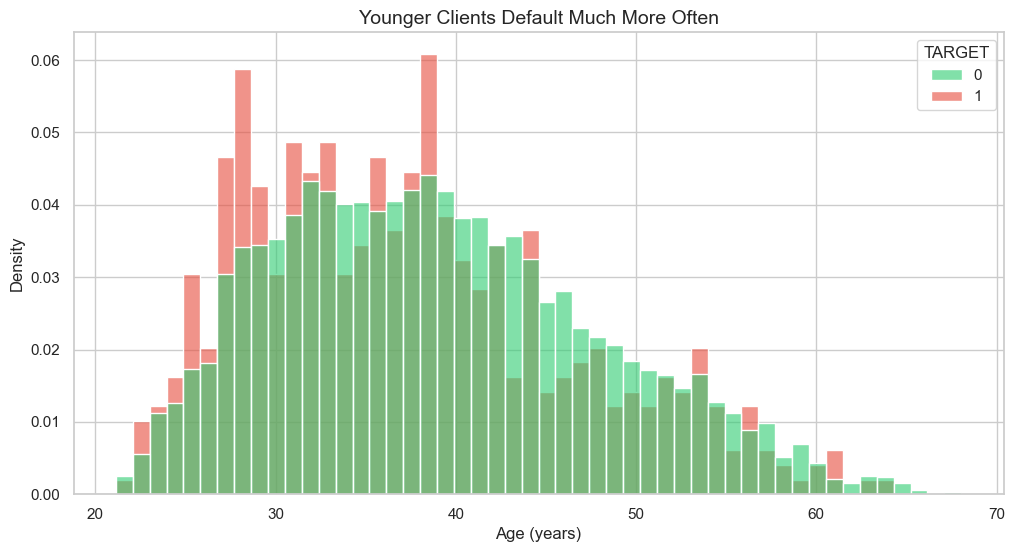

C:\Users\User\AppData\Local\Temp\ipykernel_8112\200375551.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='TARGET', y=col, palette=colors, ax=axes[i], showfliers=False)
C:\Users\User\AppData\Local\Temp\ipykernel_8112\200375551.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='TARGET', y=col, palette=colors, ax=axes[i], showfliers=False)
C:\Users\User\AppData\Local\Temp\ipykernel_8112\200375551.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='TARGET', y=col, palette=colors, ax=axes[i], showfliers

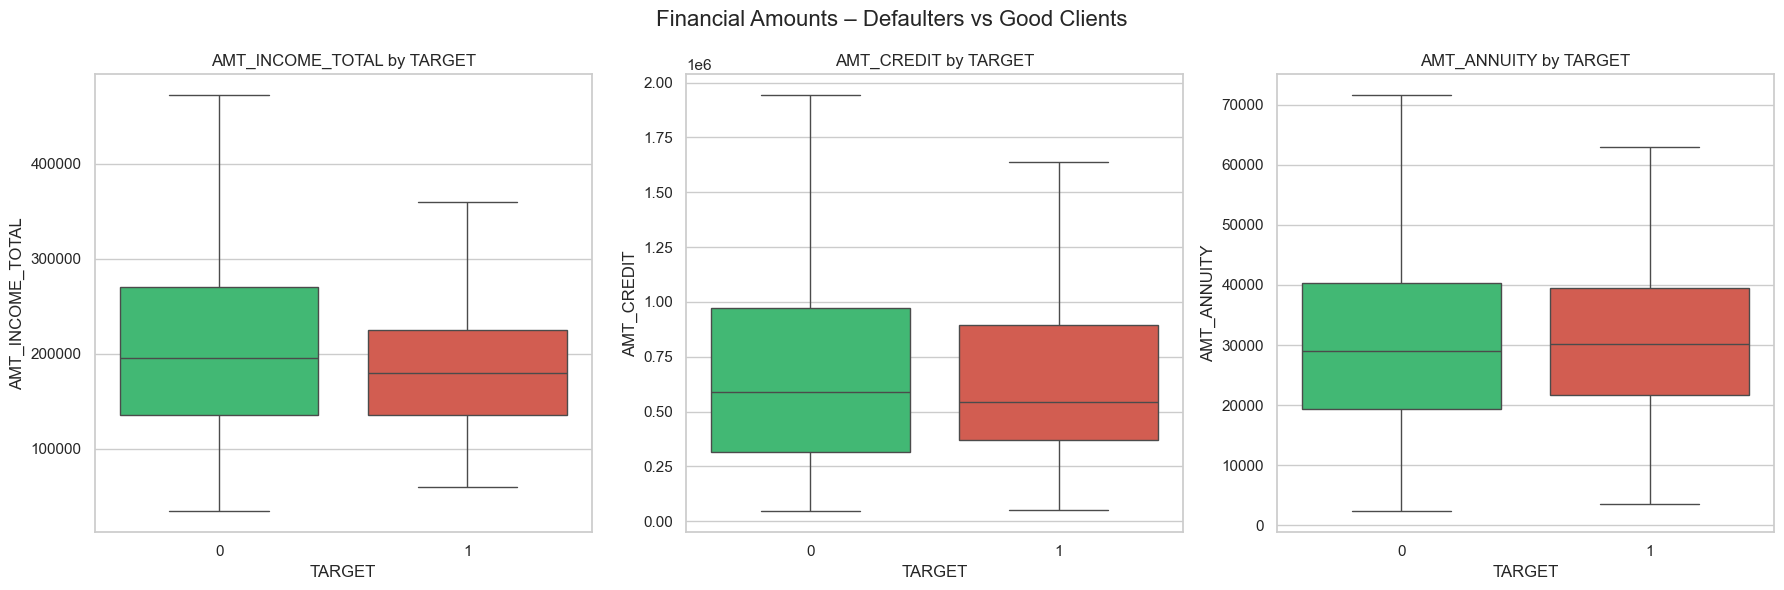

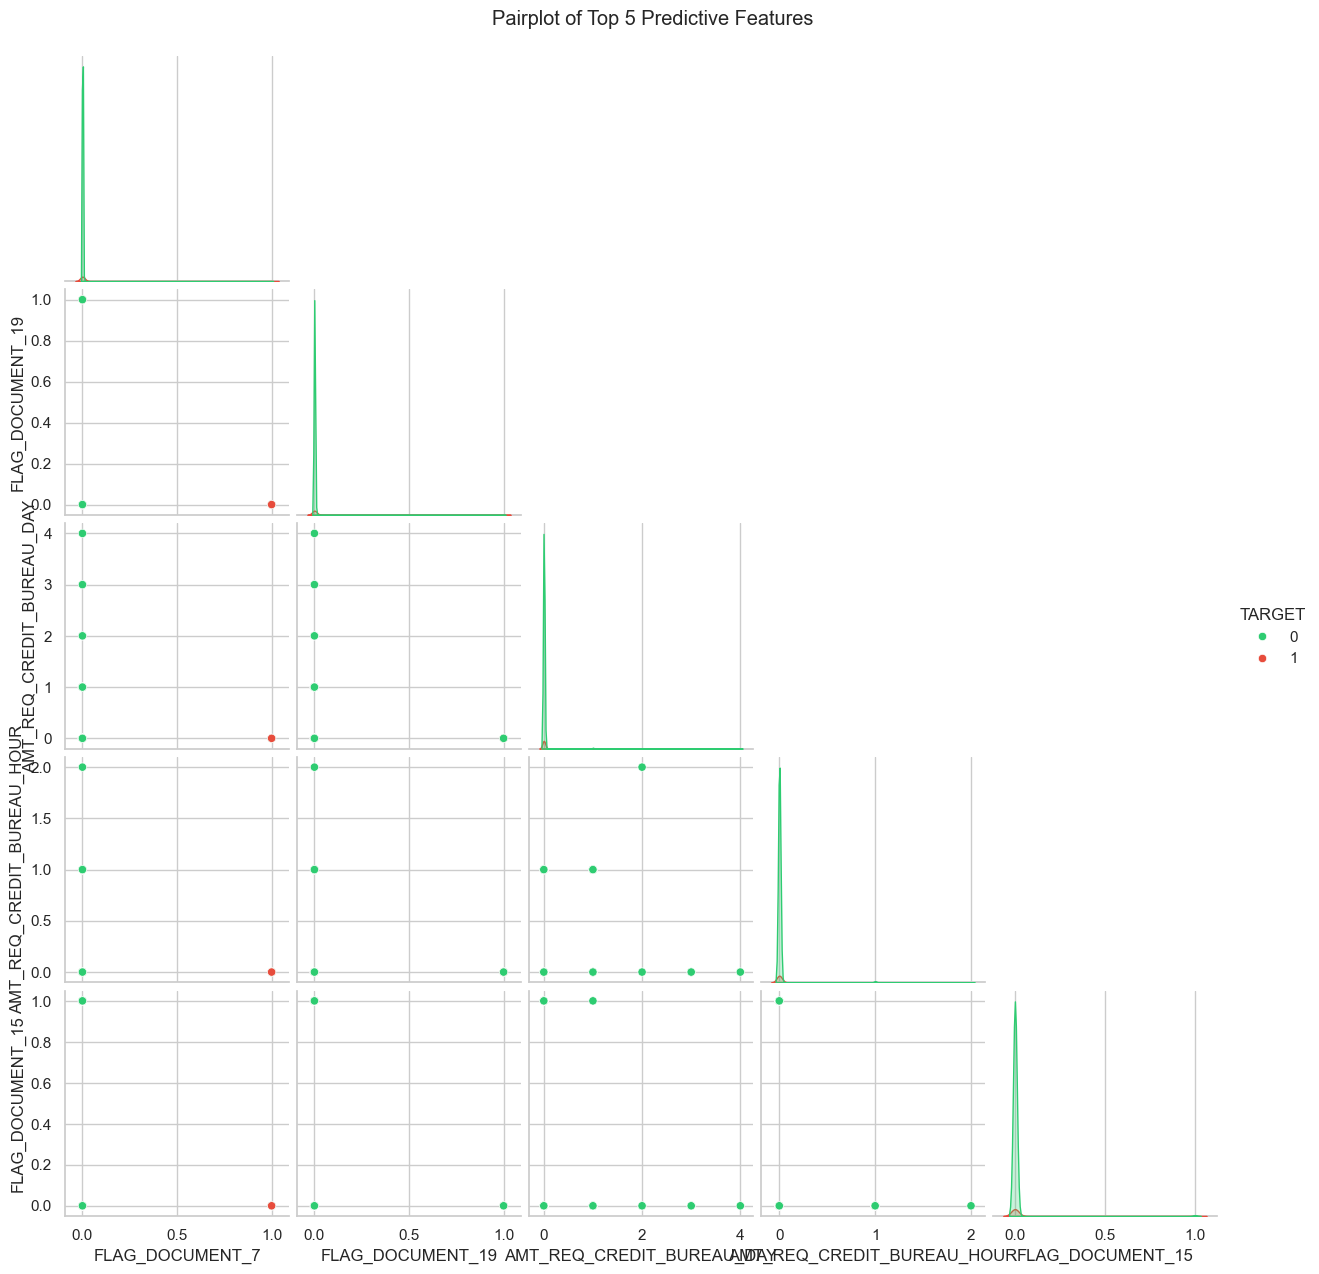

NameError: name 'interesting_cols' is not defined

<Figure size 1200x1000 with 0 Axes>

In [22]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
colors = ["#2ecc71", "#e74c3c"]

plt.figure(figsize=(10, 8))
sns.heatmap(summary[['Diff (%)']].sort_values('Diff (%)', ascending=False),
            annot=True, cmap="RdYlGn", center=0, cbar_kws={'label': 'Difference vs Good Clients (%)'},
            fmt='.1f', linewidths=0.5)
plt.title("How Much Defaulters (1) Differ from Good Clients (0) – % Difference", fontsize=14, pad=20)
plt.ylabel("Feature")
plt.show()

top15 = summary.head(15).sort_values('Diff (%)', ascending=True)

plt.figure(figsize=(10, 8))
bars = plt.barh(top15.index, top15['Diff (%)'], 
                color=[colors[1] if x < 0 else colors[0] for x in top15['Diff (%)']])

plt.xlabel("Difference vs Good Clients (%)", fontsize=12)
plt.title("Top 15 Features That Separate Defaulters from Good Clients", fontsize=14, pad=20)
plt.axvline(0, color='black', linewidth=0.8)

for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + (1 if width > 0 else -1), bar.get_y() + bar.get_height()/2,
             f'{width:+.1f}%', ha='center', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
sns.kdeplot(df[df['TARGET']==0]['EXT_SOURCE_3'], label='Repaid (0)', shade=True, color=colors[0])
sns.kdeplot(df[df['TARGET']==1]['EXT_SOURCE_3'], label='Defaulted (1)', shade=True, color=colors[1])
plt.title("EXT_SOURCE_3 Distribution – The Strongest Predictor of Default", fontsize=14)
plt.xlabel("EXT_SOURCE_3 Score")
plt.legend()
plt.show()

df_plot = df.copy()
df_plot['AGE'] = df_plot['DAYS_BIRTH'] / -365

plt.figure(figsize=(12, 6))
sns.histplot(data=df_plot, x='AGE', hue='TARGET', bins=50, palette=colors, alpha=0.6, stat="density", common_norm=False)
plt.title("Younger Clients Default Much More Often", fontsize=14)
plt.xlabel("Age (years)")
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']

for i, col in enumerate(cols):
    sns.boxplot(data=df, x='TARGET', y=col, palette=colors, ax=axes[i], showfliers=False)
    axes[i].set_title(f"{col} by TARGET")
    axes[i].set_xlabel("TARGET")

plt.suptitle("Financial Amounts – Defaulters vs Good Clients", fontsize=16)
plt.tight_layout()
plt.show()

top5_cols = summary.head(5).index.tolist() + ['TARGET']
sns.pairplot(df[top5_cols], hue='TARGET', palette=colors, corner=True, diag_kind='kde')
plt.suptitle("Pairplot of Top 5 Predictive Features", y=1.02)
plt.show()

plt.figure(figsize=(12, 10))
corr = df[interesting_cols + ['TARGET']].corr()
mask = np.triu(corr)
sns.heatmap(corr, mask=mask, annot=True, cmap="coolwarm", center=0, fmt='.2f', square=True)
plt.title("Correlation Matrix – Key Features + TARGET", fontsize=14)
plt.show()

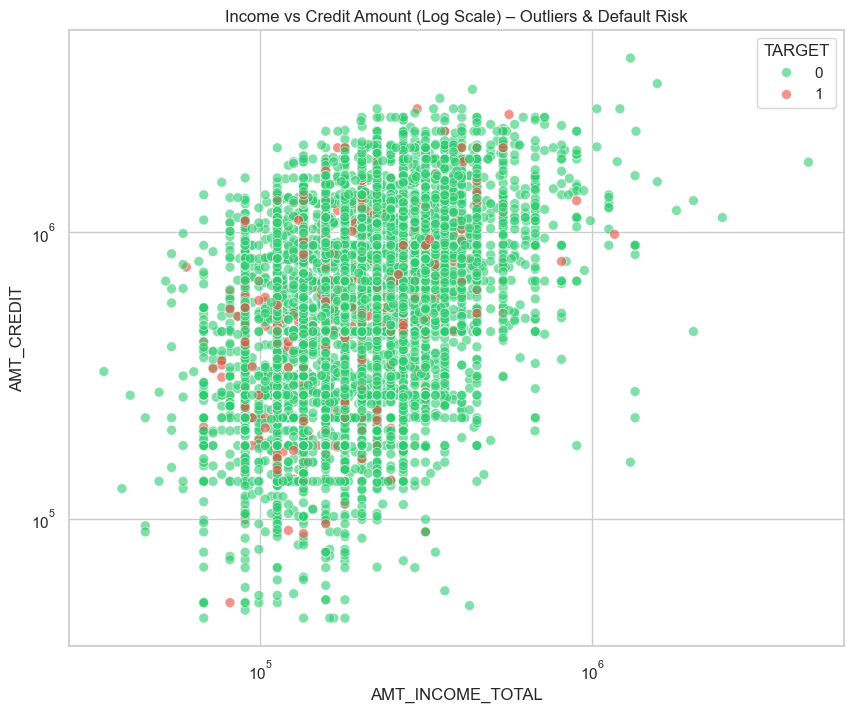

In [27]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='AMT_INCOME_TOTAL', y='AMT_CREDIT', 
                hue='TARGET', palette=colors, alpha=0.6, s=50)
plt.xscale('log')
plt.yscale('log')
plt.title("Income vs Credit Amount (Log Scale) – Outliers & Default Risk")
plt.savefig('outliers.png', dpi=301)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8112\2161714137.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=child_risk, x='CNT_CHILDREN', y='TARGET', palette='Reds')


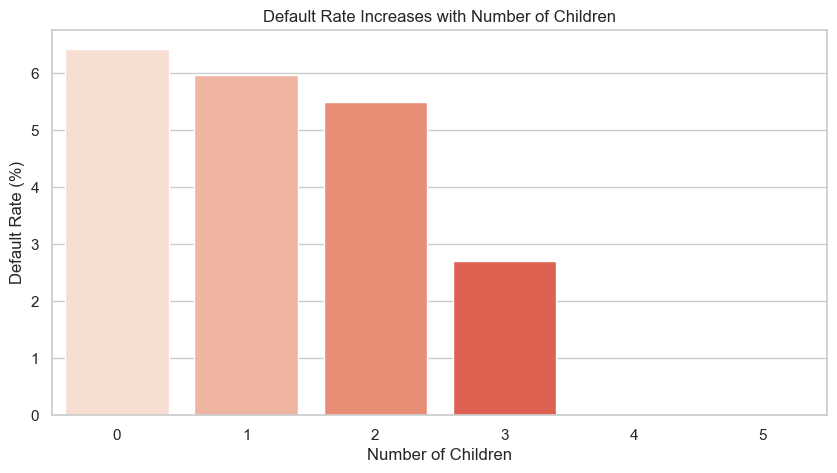

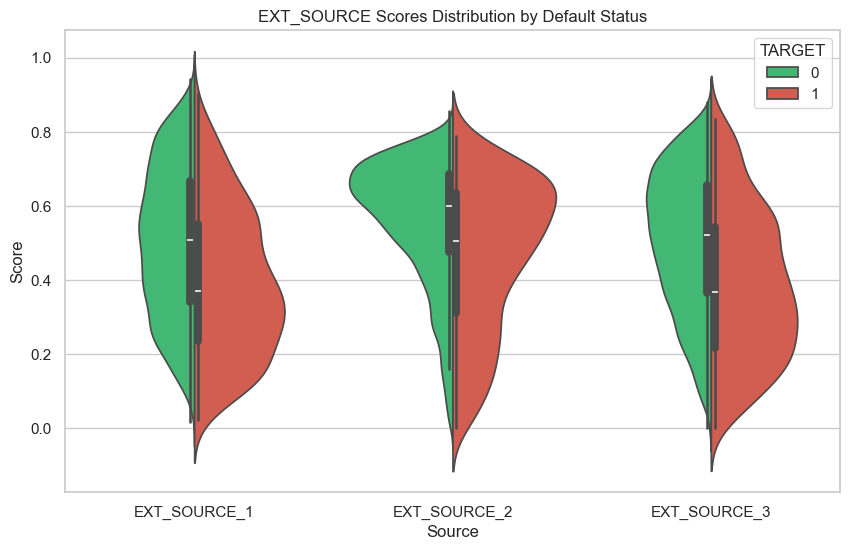

In [24]:
child_risk = df.groupby('CNT_CHILDREN')['TARGET'].mean().reset_index()
child_risk['TARGET'] = child_risk['TARGET'] * 100

plt.figure(figsize=(10, 5))
sns.barplot(data=child_risk, x='CNT_CHILDREN', y='TARGET', palette='Reds')
plt.title("Default Rate Increases with Number of Children")
plt.ylabel("Default Rate (%)")
plt.xlabel("Number of Children")
plt.show()

ext_cols = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET']
ext_long = df[ext_cols].melt(id_vars='TARGET', var_name='Source', value_name='Score')

plt.figure(figsize=(10, 6))
sns.violinplot(data=ext_long, x='Source', y='Score', hue='TARGET', split=True, palette=colors)
plt.title("EXT_SOURCE Scores Distribution by Default Status")
plt.show()